# Analyse Objects

 work with Weakly_2023_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/29
- update : 2023/12/29


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
filesource_in="objectTable_202312.csv"

In [3]:
tract_selected = 5615

In [4]:
suptitle = f"Objects tract = {tract_selected}"

In [5]:
df = pd.read_csv(filesource_in)

In [6]:
df

,objectId,coord_raErr,footprintArea,deblend_nChild,xErr,shape_flag,coord_decErr,detect_isPatchInner,detect_isPrimary,detect_isDeblendedModelSource,...,r_kronFlux_flag_bad_radius,r_kronFlux_flag_bad_shape,r_kronFlux_flag_bad_shape_no_psf,r_kronFlux_flag_edge,r_kronFlux_flag_no_fallback_radius,r_kronFlux_flag_no_minimum_radius,r_kronFlux_flag_small_radius,r_kronFlux_flag_used_minimum_radius,r_kronFlux_flag_used_psf_radius,tabid_idx
0,2229491822269300737,NaN,1759,1,NaN,True,NaN,False,False,False,...,True,True,True,True,True,True,True,True,True,0
1,2229491822269300738,NaN,2321,1,NaN,True,NaN,False,False,False,...,True,True,True,True,True,True,True,True,True,0
2,2229491822269300739,0.000034,1228,1,1.355990,False,0.000030,False,False,False,...,True,True,True,True,True,True,True,True,True,0
3,2229491822269300740,0.000013,4155,1,0.495148,False,0.000012,False,False,False,...,True,True,True,True,True,True,True,True,True,0
4,2229491822269300741,NaN,3651,1,NaN,True,NaN,False,False,False,...,True,True,True,True,True,True,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,2229027828362380001,NaN,5,0,NaN,True,NaN,True,False,True,...,True,True,False,False,False,False,True,False,True,97
51485,2229027828362380002,NaN,6,0,NaN,True,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,97
51486,2229027828362380003,NaN,4,0,NaN,True,NaN,False,False,True,...,True,True,False,False,False,False,True,False,True,97
51487,2229027828362380004,0.000131,14,0,5.175993,True,0.000103,False,False,True,...,False,True,False,False,False,False,False,False,False,97


In [7]:
#colnames = sorted(list(df.columns))
#for name in colnames:
#    print(name)

In [8]:
df_sel = df[['objectId','tabid_idx','x','y','coord_ra','coord_dec','tract','patch','refExtendedness','detect_isPrimary','detect_isIsolated',
            'g_calibFlux','g_psfFlux','g_cModelFlux','g_kronFlux',
            'r_calibFlux','r_psfFlux','r_cModelFlux','r_kronFlux',
            'i_calibFlux','i_psfFlux','i_cModelFlux','i_kronFlux']]

In [9]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [10]:
df_sel["g_psfMag"] =  df_sel['g_psfFlux'].map(convert_fluxtomag)
df_sel["r_psfMag"] =  df_sel['r_psfFlux'].map(convert_fluxtomag)
df_sel["i_psfMag"] =  df_sel['i_psfFlux'].map(convert_fluxtomag)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(lambda x:-2.50 * np.log10(x) + 31.4)
df_sel["g_calibMag"] =  df_sel['g_calibFlux'].map(convert_fluxtomag)
df_sel["r_calibMag"] =  df_sel['r_calibFlux'].map(convert_fluxtomag)
df_sel["i_calibMag"] =  df_sel['i_calibFlux'].map(convert_fluxtomag)

df_sel["g_cModelMag"] =  df_sel['g_cModelFlux'].map(convert_fluxtomag)
df_sel["r_cModelMag"] =  df_sel['r_cModelFlux'].map(convert_fluxtomag)
df_sel["i_cModelMag"] =  df_sel['i_cModelFlux'].map(convert_fluxtomag)

df_sel["g_kronMag"] =  df_sel['g_kronFlux'].map(convert_fluxtomag)
df_sel["r_kronMag"] =  df_sel['r_kronFlux'].map(convert_fluxtomag)
df_sel["i_kronMag"] =  df_sel['i_kronFlux'].map(convert_fluxtomag)

/tmp/ipykernel_74681/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_74681/3752548576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["g_psfMag"] =  df_sel['g_psfFlux'].map(convert_fluxtomag)
/tmp/ipykernel_74681/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_74681/3752548576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["r_psfMag"] =  df_se

In [11]:
selection1 = df_sel['refExtendedness']==False
selection2 = df_sel['detect_isPrimary']
selection3 = df_sel['tract'] == tract_selected
selection4 = df_sel['r_cModelMag'] < 16

df_sel = df_sel[selection1 & selection2 & selection3 & selection4]

In [12]:
df_sel.dropna(axis=0,inplace = True)

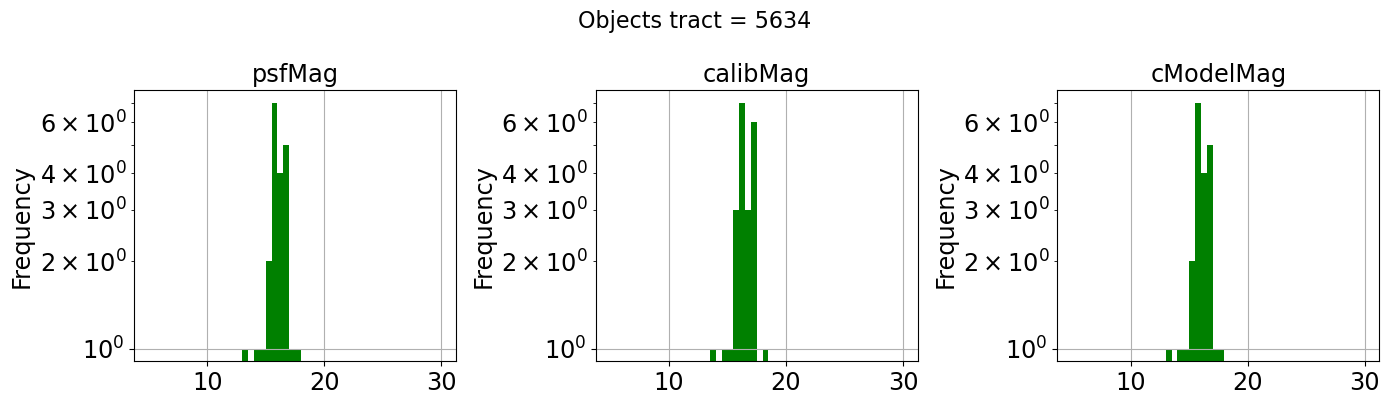

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
df_sel["g_psfMag"].plot(kind="hist",bins=50,range=(5,30),facecolor="g",logy=True,grid=True,title="psfMag",ax=ax1)
df_sel['g_calibMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="g",logy=True,grid=True,title="calibMag",ax=ax2)
df_sel['g_cModelMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="g",logy=True,grid=True,title="cModelMag",ax=ax3)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

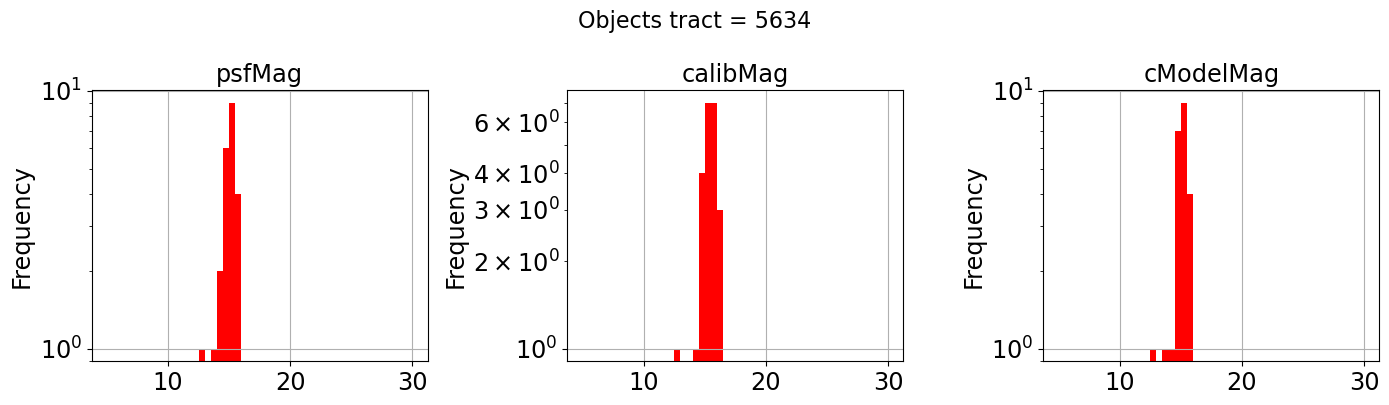

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
df_sel["r_psfMag"].plot(kind="hist",bins=50,range=(5,30),facecolor="r",logy=True,grid=True,title="psfMag",ax=ax1)
df_sel['r_calibMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="r",logy=True,grid=True,title="calibMag",ax=ax2)
df_sel['r_cModelMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="r",logy=True,grid=True,title="cModelMag",ax=ax3)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

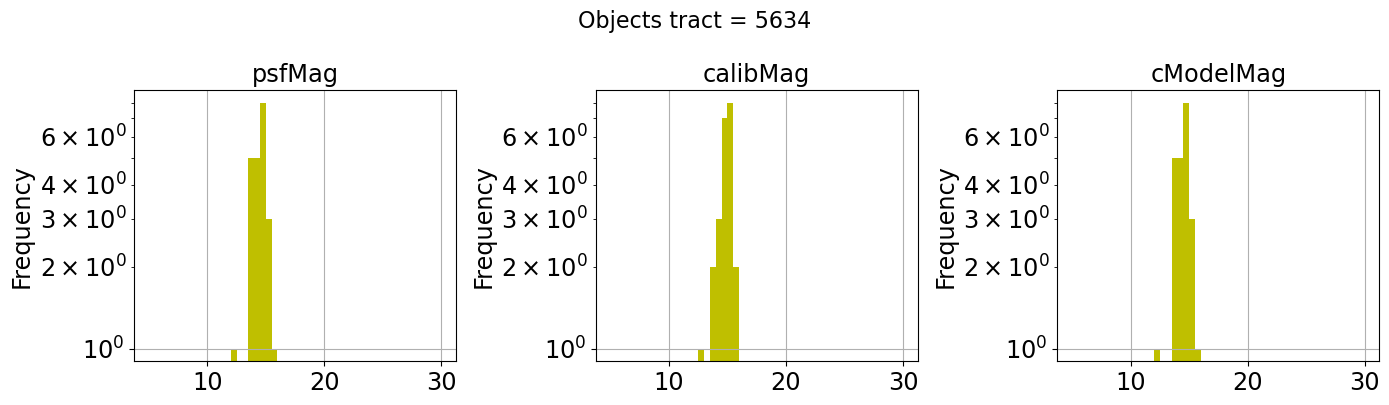

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
df_sel["i_psfMag"].plot(kind="hist",bins=50,range=(5,30),facecolor="y",logy=True,grid=True,title="psfMag",ax=ax1)
df_sel['i_calibMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="y",logy=True,grid=True,title="calibMag",ax=ax2)
df_sel['i_cModelMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="y",logy=True,grid=True,title="cModelMag",ax=ax3)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

Text(0.5, 0.98, 'Objects tract = 5634')

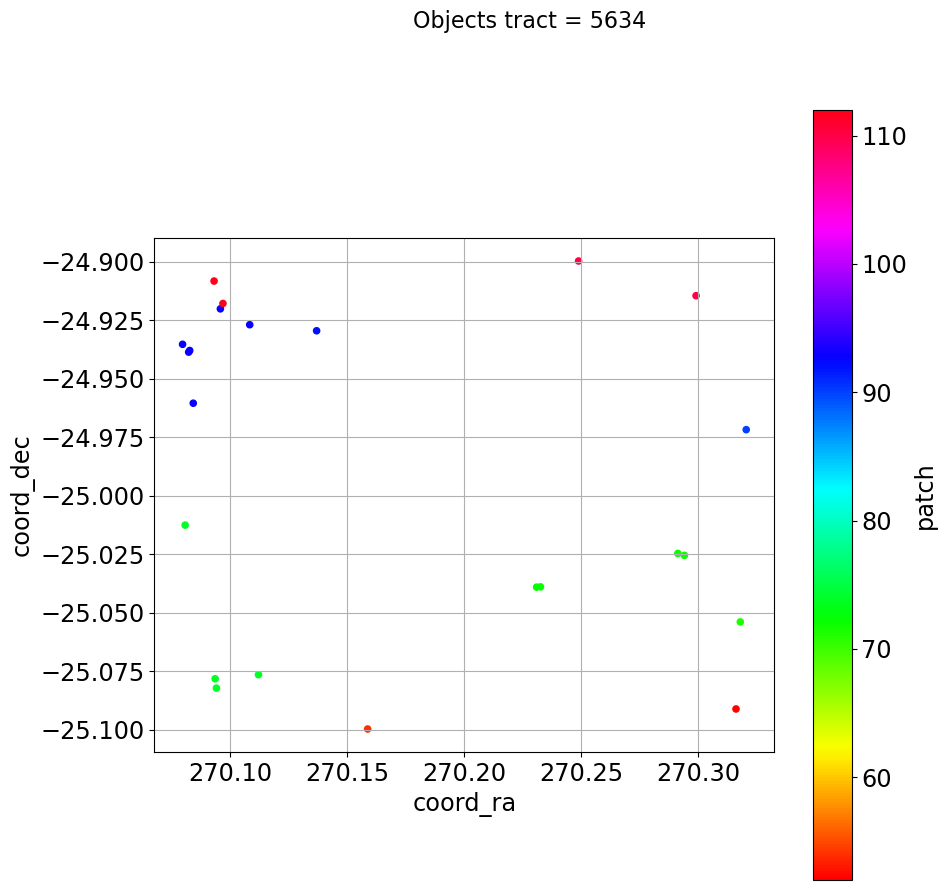

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
df_sel.plot.scatter('coord_ra','coord_dec',c='patch',colormap='hsv',grid=True,ax=ax)
plt.gca().set_aspect('equal')
plt.suptitle(suptitle,fontsize=16)

<Axes: title={'center': 'coord_ra'}, ylabel='Frequency'>

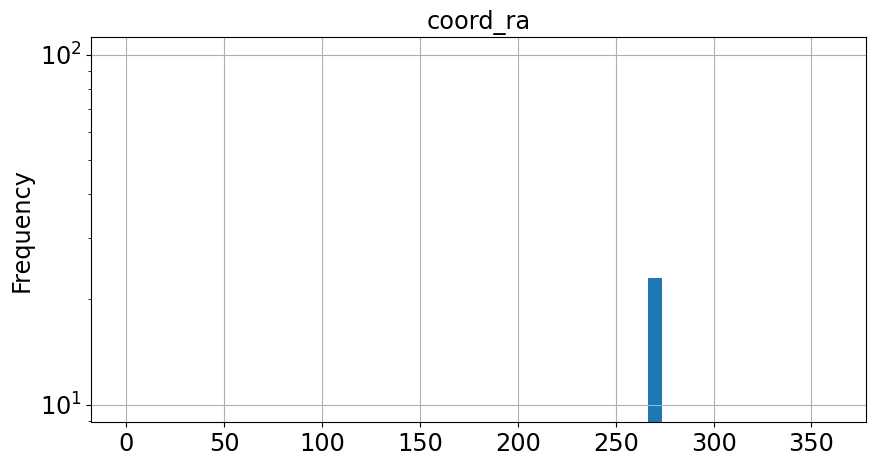

In [17]:
df_sel['coord_ra'].plot(kind="hist",bins=50 ,range=(0,360),logy=True,title="coord_ra",grid=True,figsize=(10,5))

<Axes: title={'center': 'coord_dec'}, ylabel='Frequency'>

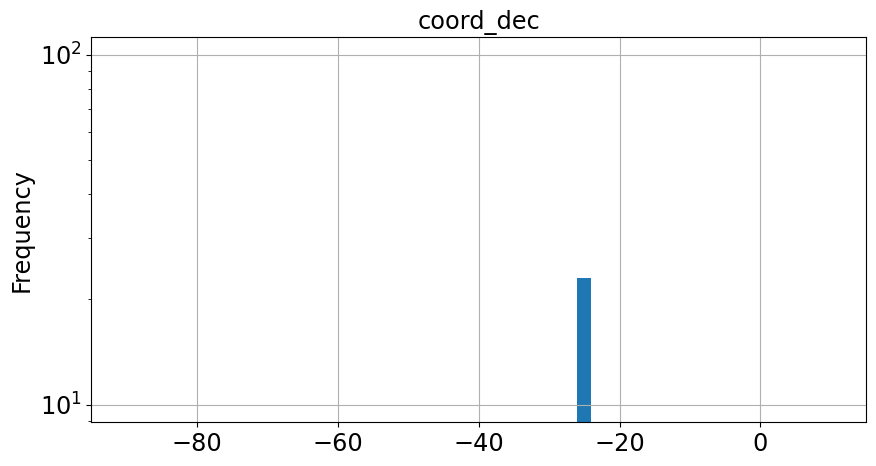

In [18]:
df_sel['coord_dec'].plot(kind="hist",bins=50 ,range=(-90,10),logy=True,title="coord_dec",grid=True,figsize=(10,5))